In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.join(os.getcwd(),"../算法封装"))
print(sys.path)
from LMband import LMband

['f:\\workspace\\jupyter\\论文\\graduation thesis\\算例分析', 'd:\\anaconda\\envs\\cplex\\python37.zip', 'd:\\anaconda\\envs\\cplex\\DLLs', 'd:\\anaconda\\envs\\cplex\\lib', 'd:\\anaconda\\envs\\cplex', '', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\chardet-3.0.4-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\docloud-1.0.375-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\urllib3-1.25.11-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\fonttools-4.36.0-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\cvxopt-1.3.0-py3.7-win-amd64.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\pytz-2022.2.1-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32\\lib', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\Pythonwin', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\0\\.ipython', 'f:\\workspace\\j

In [2]:
def get_rf(d,p):
    tmp=[]
    for i,a in enumerate(p):
        idx=np.where(a!=0)[0]
        a=a&0
        if len(idx)>0:
            a[:idx[0]]=1
        tmp.append((d[i]*a).sum())
    return tmp

In [3]:
phase = np.loadtxt("./data/phase")
cir=phase[0].sum()
phase=phase/cir
vol = np.loadtxt("./data/volume")
qv = np.loadtxt("./data/path_vol")
phase_get = np.load("./data/phase_get.npy")
d = np.loadtxt("../distance")
straight_get = np.load("./data/straight_get.npy")
ison = np.array([0, 0, 0, 1, 1, 1])
px = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
pxb = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
qb=[120,120]
lower, upper = 8, 12
linspace = np.arange(lower, upper, 1)
lin_num = len(linspace)

# 南北直行方向绿灯时间
sg=np.array([(straight_get[i]*phase).sum(axis=1) for i in range(len(straight_get))])
rho = vol[0] / vol[1]
num = len(vol[0])
numr = len(qv)
nump = len(phase_get)
M = 1e6
nx = 0.00000001
be = 8
speedScope = np.array([lower, upper])
speedVar = np.array([-2, 2])

g=np.array([(phase_get[i]*phase).sum(axis=1) for i in range(numr) ])
r=1-g
rf=np.array([get_rf(phase,phase_get[i]) for i in range(numr)])

ex=[1,0,1,0,1,0,1,1,1,1,1,0]
dwt=15



In [4]:
lmb=LMband(phase, [80,180], vol, qv, phase_get, d, straight_get, ison, px, pxb, qb, lower, upper, 
           linspace, be, speedVar[0], speedVar[1],ex, dwt,lower,upper,speedVar[0], speedVar[1],9,2)
lmb._M1_solve()

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125

Multi-objective solve log . . .

Index  Priority  Blend          Objective      Nodes  Time (sec.)  DetTime (ticks)

Performing restart 1
    1         0      3   1.2136840669e+04      66728         5.08          3299.40
status  = multi-objective optimal
time    = 5.078 s.
problem = MILP
gap     = 3.18265e+73%

object value: 3142


In [5]:
lmb._M2_solve()

conflict(s): 0
Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125

Multi-objective solve log . . .

Index  Priority  Blend          Objective      Nodes  Time (sec.)  DetTime (ticks)

Performing restart 1
    1         2      2   1.5564840516e+04       4808         0.89           477.95

Performing restart 1

Performing restart 2
    2         1      1   1.2124596956e+02      51131         6.48          4183.66
status  = multi-objective optimal
time    = 7.375 s.
problem = MILP
gap     = 3.18265e+73%

object value 3142


In [6]:
lmb.get_dataframe()

,cross_number,distance,b1,b2,b3,b4,b5,b6,offset,p,...,u3,u4,u5,u6,bb1,bb2,dw1,dw2,tb1,tb2
0,1.0,236.0,19.666113,19.666113,0.000000,22.853887,0.000000,22.853887,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,22.560000,26.400000,15.000,15.0,34.666667,34.666667
1,2.0,457.0,14.960000,14.960000,0.000000,22.853887,0.000000,22.853887,32.393887,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,14.960000,26.400000,15.000,15.0,53.405277,46.261390
2,3.0,346.0,14.960000,14.960000,0.000000,16.000000,0.000000,16.000000,11.871943,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,14.960000,16.000000,30.000,30.0,73.250000,73.250000
3,4.0,227.0,45.900005,45.900001,0.000000,12.026665,0.000000,12.026665,117.212705,1.0,...,1.000000e-08,0.000000e+00,1.000000e-08,1.000000e-08,45.900000,16.053333,15.000,15.0,18.916667,18.916667
4,5.0,226.0,45.899995,45.899999,0.000000,12.026661,0.000000,12.026665,136.129372,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.900000,8.000000,15.000,30.0,33.833333,58.250000
5,6.0,236.0,8.000003,0.000000,19.440000,47.463703,0.000000,47.463701,31.072316,1.0,...,1.275000e-01,1.000000e-08,1.000000e-08,-2.999208e-08,14.536297,47.463703,15.000,15.0,29.500000,29.500000
6,7.0,200.0,19.440000,0.000000,19.440000,19.440000,0.000000,19.440000,15.584167,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19.440000,19.440000,30.000,15.0,55.000000,31.666667
7,8.0,135.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.824167,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,13.200000,13.200000,16.555,30.0,27.805000,46.875000
8,9.0,117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.309167,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23.840000,13.200000,15.000,30.0,24.750000,44.625000
9,10.0,402.0,36.826167,0.000000,36.826167,36.826167,36.826167,0.000000,16.881698,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,36.826167,36.826165,15.000,15.0,48.500000,48.500000


In [7]:
lmb.phase

array([[0.282, 0.   , 0.33 , 0.   , 0.   , 0.247, 0.   , 0.141, 0.   ],
       [0.426, 0.   , 0.368, 0.   , 0.   , 0.   , 0.206, 0.   , 0.   ],
       [0.187, 0.   , 0.2  , 0.09 , 0.   , 0.26 , 0.   , 0.26 , 0.   ],
       [0.   , 0.277, 0.   , 0.   , 0.254, 0.254, 0.   , 0.215, 0.   ],
       [0.   , 0.255, 0.   , 0.   , 0.138, 0.   , 0.49 , 0.   , 0.117],
       [0.   , 0.65 , 0.   , 0.   , 0.   , 0.   , 0.35 , 0.   , 0.   ],
       [0.   , 0.243, 0.   , 0.   , 0.215, 0.139, 0.257, 0.146, 0.   ],
       [0.   , 0.165, 0.   , 0.   , 0.25 , 0.266, 0.   , 0.319, 0.   ],
       [0.   , 0.298, 0.   , 0.   , 0.34 , 0.   , 0.362, 0.   , 0.   ],
       [0.   , 0.379, 0.   , 0.   , 0.337, 0.284, 0.   , 0.   , 0.   ],
       [0.   , 0.49 , 0.   , 0.   , 0.231, 0.132, 0.   , 0.143, 0.   ],
       [0.   , 0.379, 0.   , 0.   , 0.337, 0.   , 0.   , 0.284, 0.   ],
       [0.   , 0.3  , 0.   , 0.   , 0.186, 0.23 , 0.   , 0.283, 0.   ]])

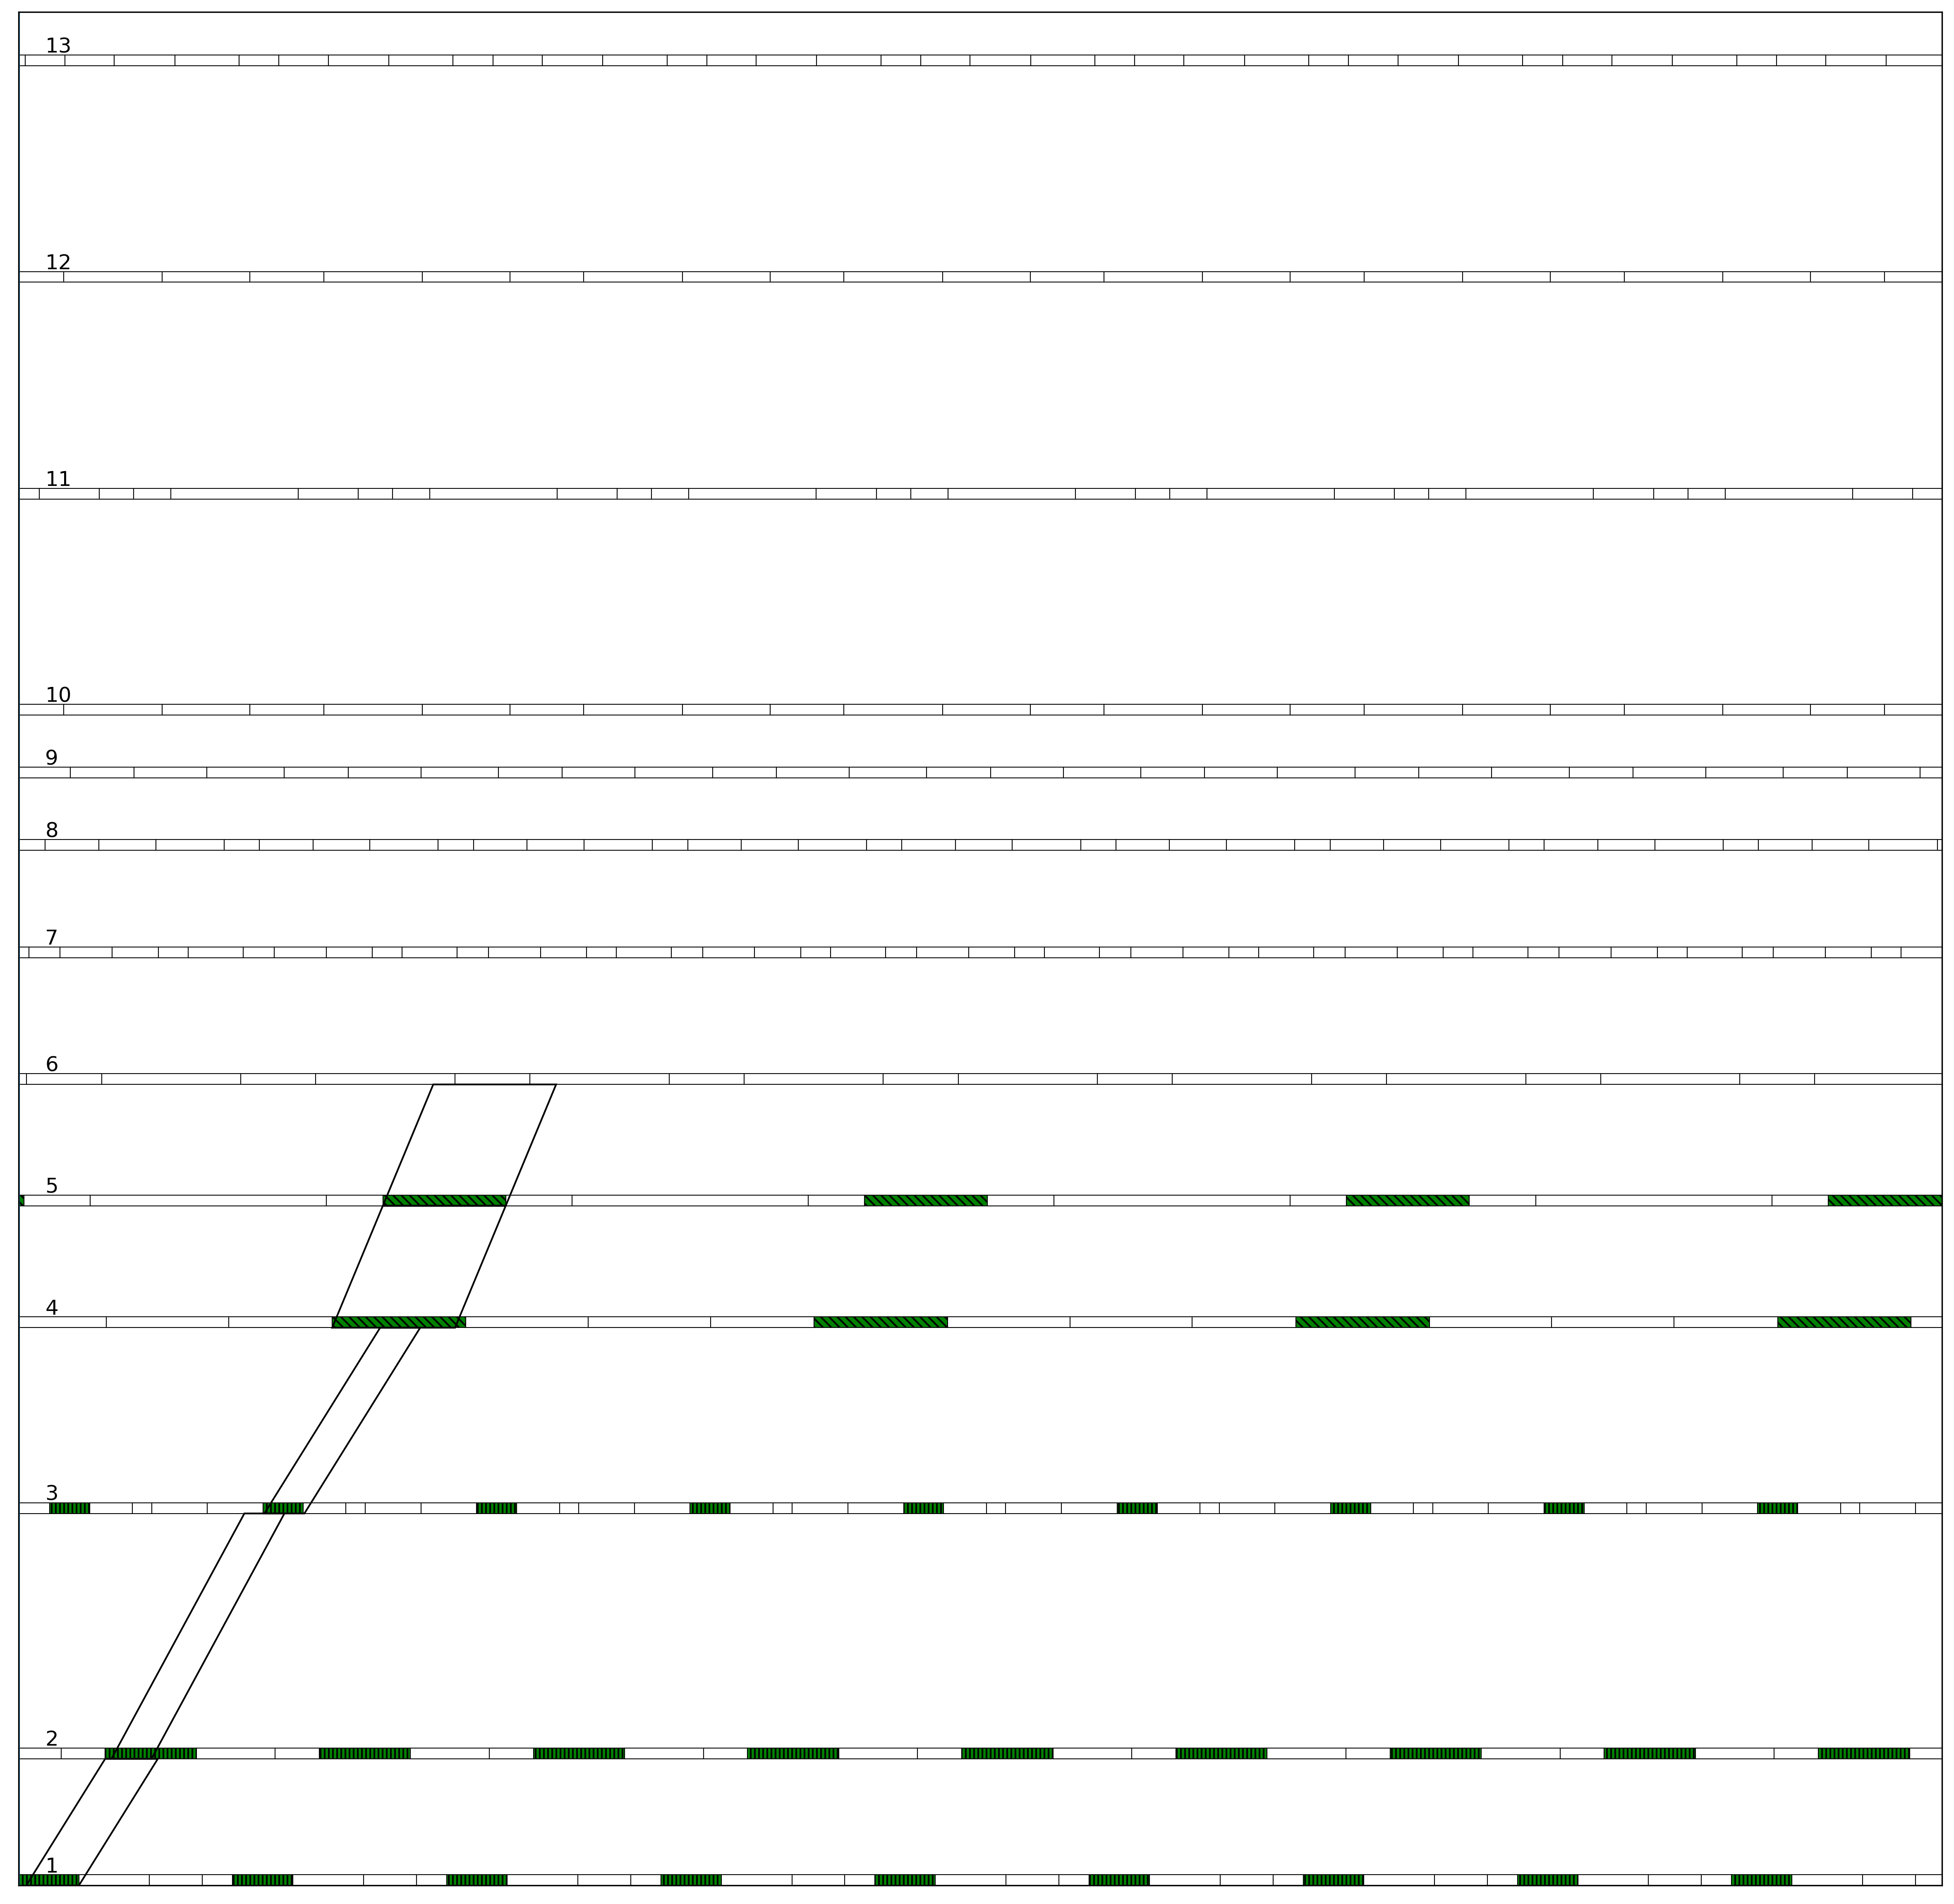

In [8]:
colors=[
            {"color":"white" , "hatch": "|||||", "fill": True},
            {"color":"white", "hatch":"\\\\\\\\\\" , "fill": False},
            {"color": "white", "hatch":"xxxxx" , "fill": True},
            {"color":"white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "//", "fill": False}
        ]
legends=["1->15", "1->6", "8->15", "15->2", "14->9", "7->1"]
lmb.draw_car_bound("./时距图",colors,legends,2)

842.56 10.532


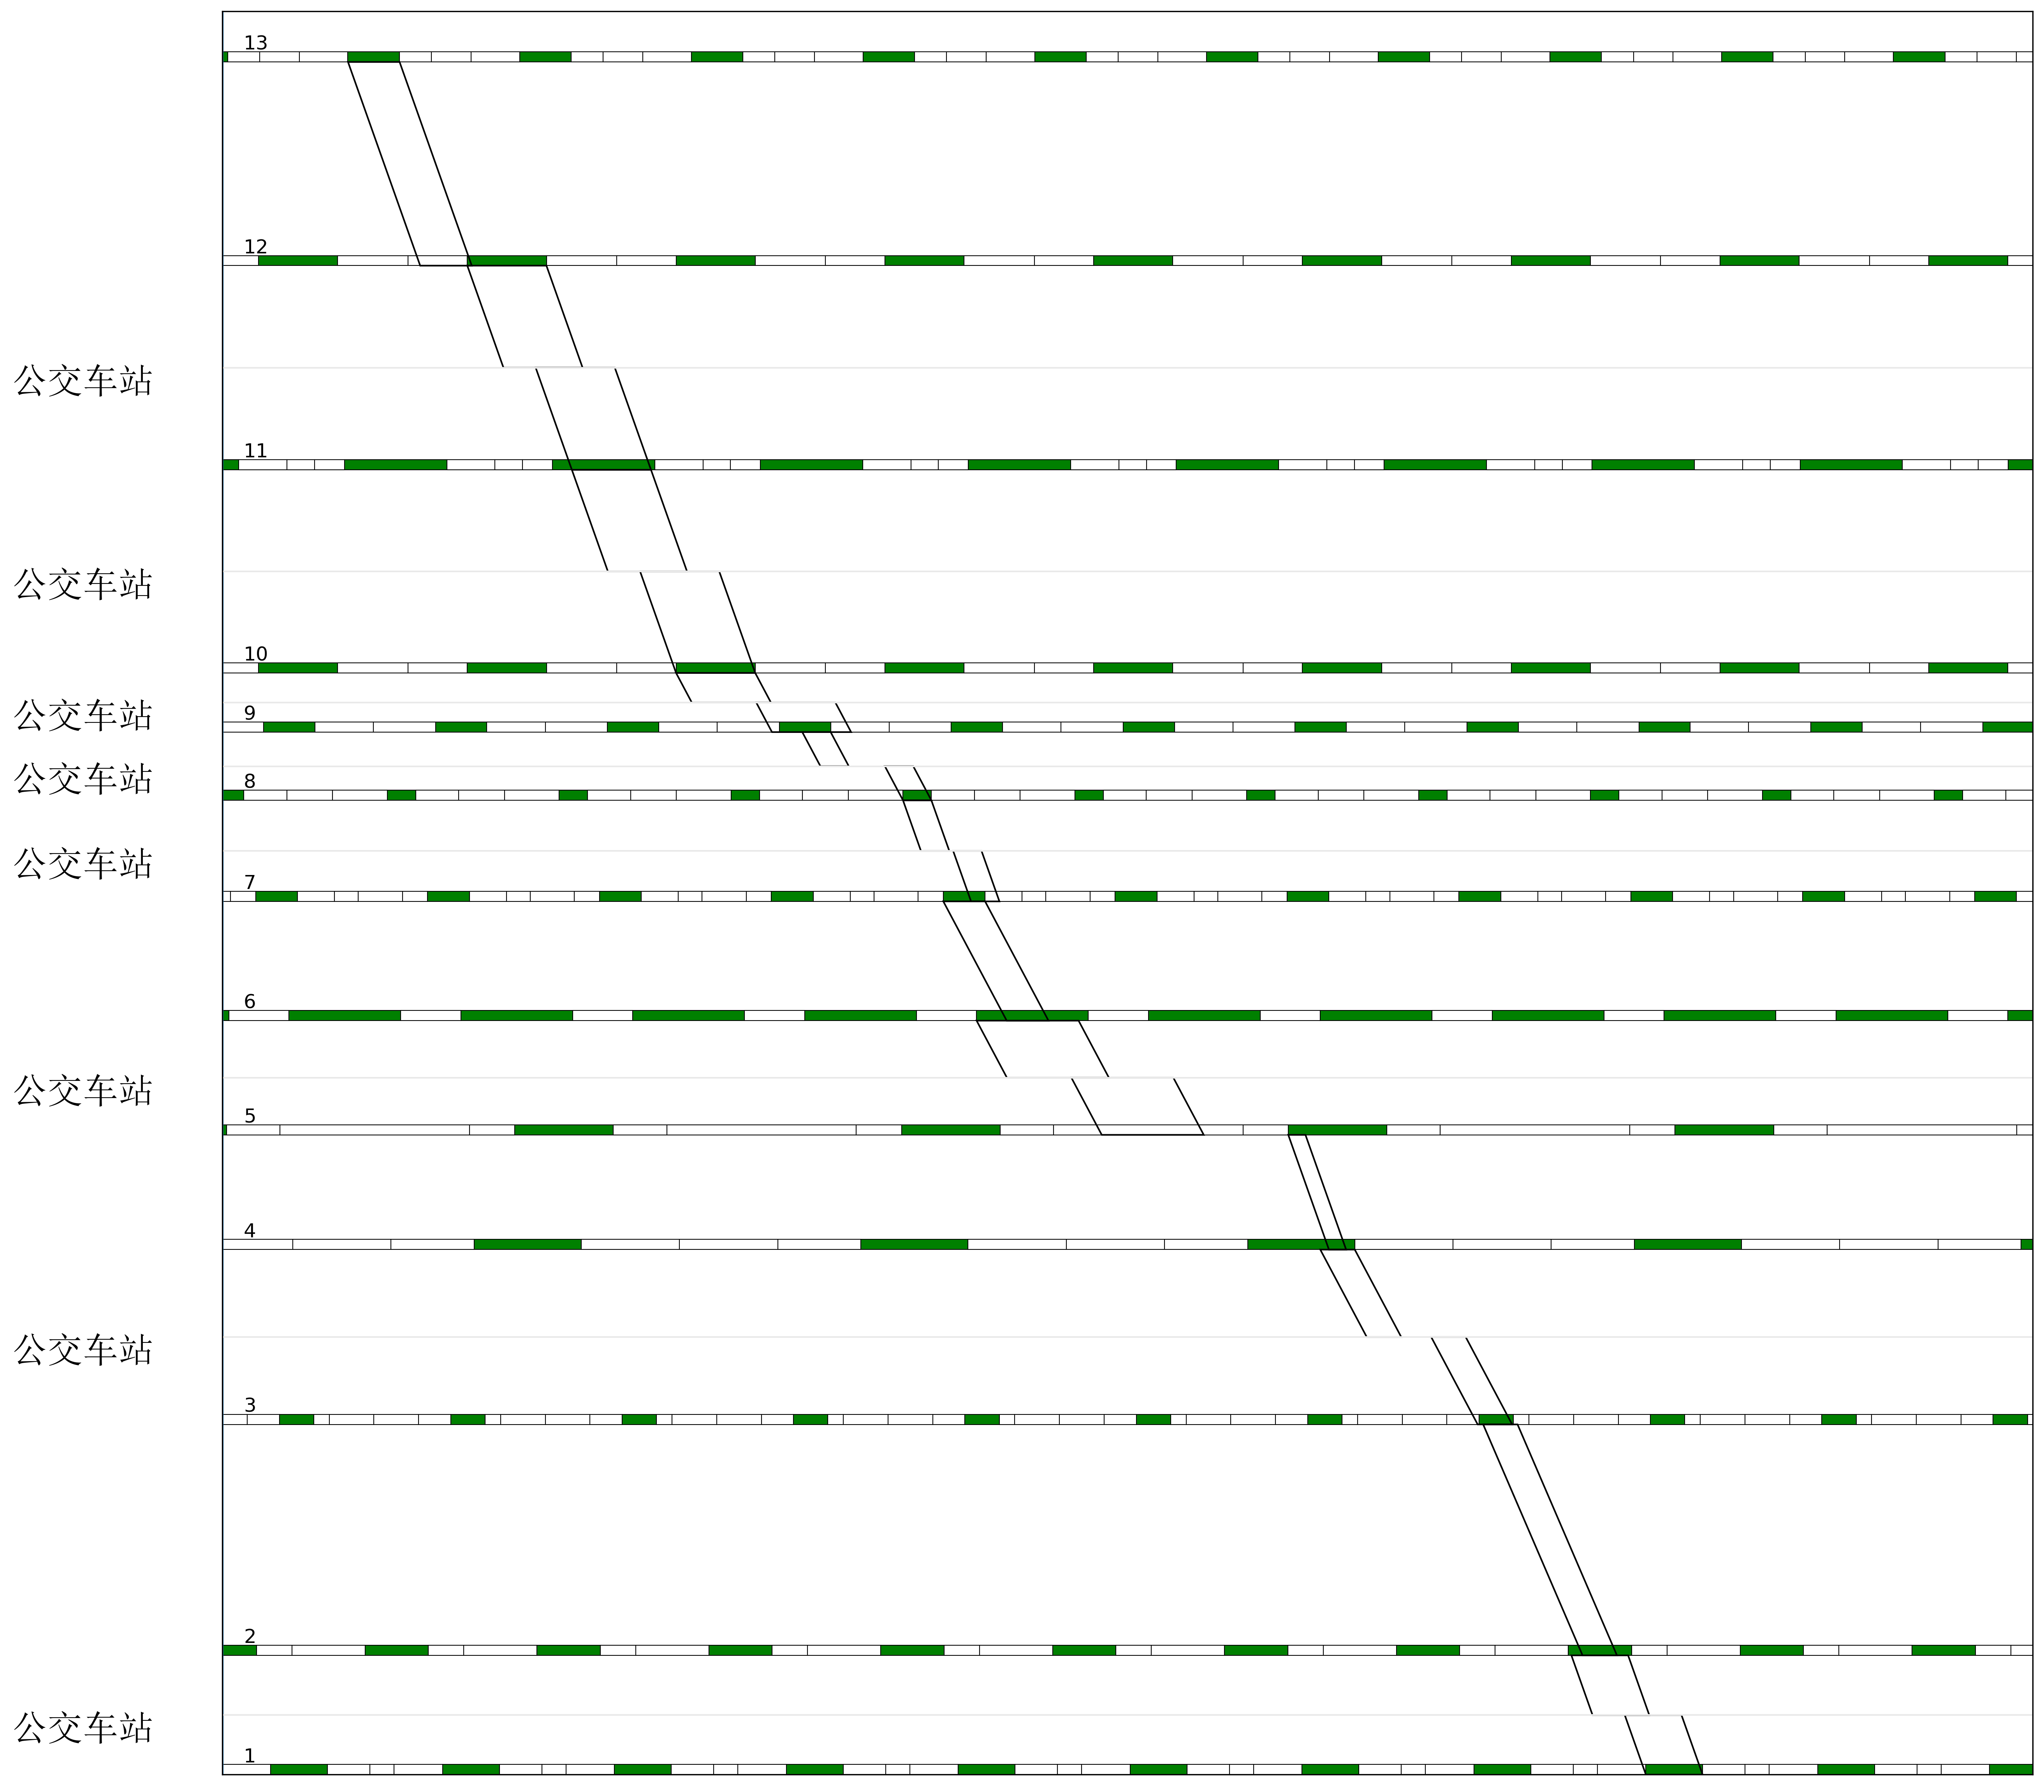

In [9]:
lmb.draw_bus_bound("./公交时距图")

In [11]:
a=lmb.get_draw_dataframe()
a.p

0     0.0
1     0.0
2     0.0
3     1.0
4     0.0
5     1.0
6     0.0
7     1.0
8     0.0
9     1.0
10    0.0
11    0.0
12    1.0
Name: p, dtype: float64

In [10]:
#常量定义
c=100
green_time=[[0.375,0.588,0.387,0.354,0.231,0.65,0.313,0.206,0.384,0.379,0.49,0.379,0.354],
            [0.22,0.206,0.213,0.177,0.169,0.35,0.145,0.238,0.22,0.336,0.231,0.336,0.186],
            [0.26,0.206,0.20,0.254,0.444,0,0.139,0.275,0.394,0.284,0.132,0.284,0.212],
            [0.145,0,0.20,0.215,0.156,0,0.257,0.281,0,0,0.143,0,0.248],
            [0,0,0,0,0,0,0.146,0,0,0,0,0,0]]
green_time=np.array(green_time)
red_time=1-green_time

qb1=[944,1220,937,691,924,924,854,1200,861,1039,658,658,649];
qb1=np.array(qb1)
qb2=[1052,1012,1082,565,1215,1291,1291,970,886,480,592,853,986];
qb2=np.array(qb2)
qb1_max=[564,564,632,265,611,924,508,644,733,877,506,658,487]
qb1_max=np.array(qb1_max)
qb2_max=[541,651,546,210,874,1291,934,430,595,326,406,699,660]
qb2_max=np.array(qb2_max)
q_on=[394,186,382,647,120,0,443,116,621,65,591,88]
q_on=np.array(q_on)
q_in=[459,362,604,69,0,103,573,190,375,118,154,225]
q_in=np.array(q_in)
r_on=[0.81,0.518,0.380,0.538,1,0.426,0.785,0.610,0.865,0.487,1,0.608]
r_in=[0.504,0.601,0.6385,0.267,0.73,1,0.742,0.398,0.774,0.551,0.476,0.743]
d=[804,515,494,485,363,264,595,1031,413,551,562,828];
n_road_on=[2,2,2,3,3,3,3,3,3,3,3,3]
n_road_in=[2,2,2,3,2,3,3,3,3,2,2,3]
    
exsist=[1,0,1,0,1,0,1,1,1,1,1,0];
dwelltime=15/c
speed_u=2
speed_d=2
ran_2=range(1,3)
delta_vc_min=-2
delta_vc_max=2
delta_vb_min=-1
delta_vb_max=1
num=len(green_time[0])
M=1000000
J_sum=num//2
be=8/c
J=J_sum
ran_num=range(1,num+1)
ran_4=range(1,5)
ran_J=range(1,J_sum+1)
ran_J_1=range(1,J_sum)
ran_num_1=range(1,num)
input_n=3
nx=0.0000001
ta=2/c
td=1/c